# Part B: Fisher's Linear Discriminant Analysis
## Learning Task 1
1. Build Fisher's linear discriminant model (FLDM1) on training data and reduce 32 dimensional problem to univariate dimensional problem
2. Finding out decision boundary in univariate dimension using generative approach

In [1]:
import numpy as np
import pandas as pd
import sys
sys.path.append("..")
from preprocessor import Preprocessor
from Models.FischersLinearDiscriminant import FischersLinearDiscriminant
import warnings 
warnings.filterwarnings(action="ignore")

In [2]:
dataset = pd.read_csv("../dataset.csv")
dataset.drop(columns = ["id"], inplace=True)
preprocessor_1 = Preprocessor(dataset, "diagnosis")
splits = preprocessor_1.preprocess(drop_na=False, standardize=True, labels=[1, 0], n_splits=10)

{1: 'B', 0: 'M'}


In [3]:
accuracies: list[float] = []
for split in splits:
    train, test = split
    X_train, y_train = train.drop(columns=["diagnosis"]).to_numpy(), train["diagnosis"].to_numpy()
    X_test, y_test = test.drop(columns=["diagnosis"]).to_numpy(), test["diagnosis"].to_numpy()
    FLDM1 = FischersLinearDiscriminant()
    FLDM1.fit(X_train, y_train)
    tp, tn, fp, fn = FLDM1.score(X_test, y_test)
    accuracies.append((tp + tn) / (tp + tn + fp + fn))
mean_accuracy = np.round((np.mean(accuracies)*100), 2)
print(f"Mean accuracy = {mean_accuracy}")
print(f"Standard deviation = {np.round(np.std(accuracies), 2)}")

Mean accuracy = 95.2
Standard deviation = 0.01


-0.0005475540060768281


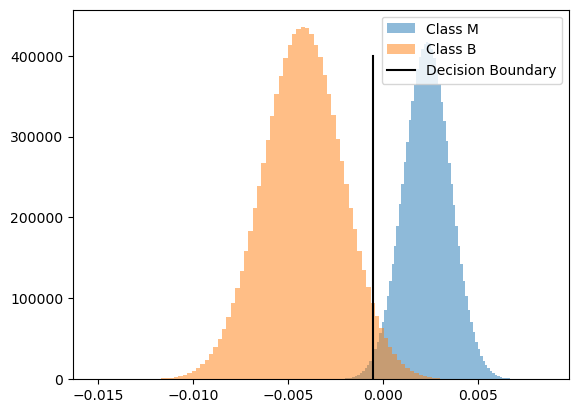

In [4]:
FLDM1.plot_gaussians()

In [8]:
# Comparing the prediction using both methods
(FLDM1.check_decision_boundary(X_test) == FLDM1.predict(X_test)).sum()/len(X_test)*100

100.0

Using decision boundary and the genrative approach to predict the class of a point give the exact same output, hence the decision boundary is correctly identified

## Learning Task 2
1. Change order of features randomly and build Fisher's linear discriminant model (FLDM2) on same training data as task 1
2. Outline the differences between FLDM1 and FLDM2 and compare their respective performances

In [6]:
accuracies: list[float] = []
permutation = np.arange(31)
np.random.shuffle(permutation)
for split in splits:
    train, test = split
    train.iloc[:,permutation]
    X_train, y_train = train.drop(columns=["diagnosis"]).to_numpy(), train["diagnosis"].to_numpy()
    X_test, y_test = test.drop(columns=["diagnosis"]).to_numpy(), test["diagnosis"].to_numpy()
    FLDM2 = FischersLinearDiscriminant()
    FLDM2.fit(X_train, y_train)
    tp, tn, fp, fn = FLDM2.score(X_test, y_test)
    accuracies.append((tp + tn) / (tp + tn + fp + fn))
mean_accuracy = np.round((np.mean(accuracies)*100), 2)
print(f"Mean accuracy = {mean_accuracy}")
print(f"Standard deviation = {np.round(np.std(accuracies), 2)}")


Mean accuracy = 95.2
Standard deviation = 0.01


-0.0005475540060768281


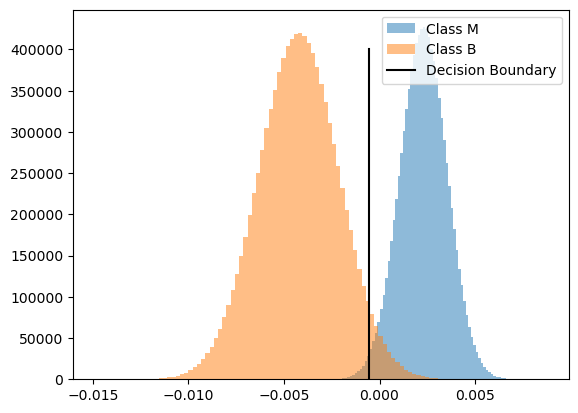

In [7]:
FLDM2.plot_gaussians()

## Conclusion

By shuffling the order of the features we only are exchanging/interchanging the features. The decision boundary remains the same. The only difference is that the decision boundary is now in a differently oriented feature space. Therefore, the weights used to proejct the data onto the decision boundary are also the same, just in a different orientation/rearranged.

This explains the exact same performance of the two models.